In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('default')
sns.set_palette("husl")

# Load GraphRAG output data
graphrag_path = "../graphrag/output/"

print("📊 Loading GraphRAG Dataset...")
print("=" * 50)

📊 Loading GraphRAG Dataset...


In [4]:
# Load statistics
with open(f"{graphrag_path}stats.json", 'r') as f:
    stats = json.load(f)

print("🔍 GraphRAG Processing Stats:")
print(f"📄 Total Documents: {stats['num_documents']}")
print(f"⏱️  Total Runtime: {stats['total_runtime']:.2f}s")
print(f"🚀 Key Workflows:")
for workflow, metrics in stats['workflows'].items():
    print(f"   • {workflow}: {metrics['overall']:.2f}s")

print("\n" + "=" * 50)

🔍 GraphRAG Processing Stats:
📄 Total Documents: 52
⏱️  Total Runtime: 1150.46s
🚀 Key Workflows:
   • load_input_documents: 0.14s
   • create_base_text_units: 0.71s
   • create_final_documents: 0.06s
   • extract_graph: 772.27s
   • finalize_graph: 0.55s
   • extract_covariates: 0.00s
   • create_communities: 0.32s
   • create_final_text_units: 0.13s
   • create_community_reports: 338.88s
   • generate_text_embeddings: 37.40s



In [5]:
# Load parquet files
entities_df = pd.read_parquet(f"{graphrag_path}entities.parquet")
relationships_df = pd.read_parquet(f"{graphrag_path}relationships.parquet")
communities_df = pd.read_parquet(f"{graphrag_path}communities.parquet")
community_reports_df = pd.read_parquet(f"{graphrag_path}community_reports.parquet")
documents_df = pd.read_parquet(f"{graphrag_path}documents.parquet")
text_units_df = pd.read_parquet(f"{graphrag_path}text_units.parquet")

print("📊 Dataset Overview:")
print(f"🏷️  Entities: {len(entities_df):,}")
print(f"🔗 Relationships: {len(relationships_df):,}")
print(f"🏘️  Communities: {len(communities_df):,}")
print(f"📋 Community Reports: {len(community_reports_df):,}")
print(f"📄 Documents: {len(documents_df):,}")
print(f"📝 Text Units: {len(text_units_df):,}")

print("\n" + "=" * 50)

📊 Dataset Overview:
🏷️  Entities: 3,832
🔗 Relationships: 5,078
🏘️  Communities: 426
📋 Community Reports: 426
📄 Documents: 52
📝 Text Units: 445



In [6]:
# Explore data structures
print("\n📊 Entities DataFrame:")
entities_df.head()


📊 Entities DataFrame:


,id,human_readable_id,title,type,description,text_unit_ids,frequency,degree,x,y
0,62dd3678-60f7-4ad5-9dac-f9b27cf3e741,0,UKRAINE,GEO,Ukraine is a country located in Eastern Europe...,[c27918948f68c4ed77b0aa78843eee65597a40e0c21d3...,39,78,0.0,0.0
1,6d25f11b-32c6-4a1f-8e89-16ef205ab041,1,KYIV,GEO,Kyiv is the capital city of Ukraine and serves...,[c27918948f68c4ed77b0aa78843eee65597a40e0c21d3...,6,8,0.0,0.0
2,d646c2cf-6fa8-45bb-9eb4-e6f00049caad,2,KYIV'S CENTRAL SQUARE,GEO,The central square in Kyiv was the site of a t...,[c27918948f68c4ed77b0aa78843eee65597a40e0c21d3...,1,0,NaN,NaN
3,2ec67961-dfe4-4d56-83f2-386fe9100644,3,COSSACK HETMANATE,ORGANIZATION,The Cossack Hetmanate was a Ukrainian state es...,[c27918948f68c4ed77b0aa78843eee65597a40e0c21d3...,1,1,0.0,0.0
4,39d6415c-3eea-408e-8118-6fd99bef114b,4,VIKTOR YUSHCHENKO,PERSON,Viktor Yushchenko was a reformist leader who c...,[c27918948f68c4ed77b0aa78843eee65597a40e0c21d3...,1,2,0.0,0.0


In [9]:
print("\n🔗 Relationships DataFrame:")
print(f"Columns: {list(relationships_df.columns)}")
# relationships_df.head()
relationships_df.loc[4146]


🔗 Relationships DataFrame:
Columns: ['id', 'human_readable_id', 'source', 'target', 'description', 'weight', 'combined_degree', 'text_unit_ids']


id                                7056fd30-060d-403d-9c39-079002b79311
human_readable_id                                                 4146
source                                                     AGRICULTURE
target                                                             GDP
description          Agriculture contributes to the overall GDP of ...
weight                                                             7.0
combined_degree                                                     77
text_unit_ids        [6567482318ed6562ddd81d4871200e26e854cc7335330...
Name: 4146, dtype: object

In [12]:
print("\n🏘️ Communities DataFrame:")
print(f"Columns: {list(communities_df.columns)}")
communities_df.head()


🏘️ Communities DataFrame:
Columns: ['id', 'human_readable_id', 'community', 'level', 'parent', 'children', 'title', 'entity_ids', 'relationship_ids', 'text_unit_ids', 'period', 'size']


,id,human_readable_id,community,level,parent,children,title,entity_ids,relationship_ids,text_unit_ids,period,size
0,7aeb3d07-42ba-4fa5-8d37-010be5e2c358,0,0,0,-1,"[30, 31, 32, 33, 34, 35, 36]",Community 0,"[745906df-1d4f-449e-a94c-596a3e0285a5, 5e88340...","[0016379f-d16e-4929-831b-2f42df4a6450, 006f391...",[0942edc9be6488eb9edc6f66db896d03fe2c31eaa0e21...,2025-07-17,86
1,a46370c7-39e0-46d3-a78f-1d8484caa825,1,1,0,-1,"[37, 38, 39, 40, 41, 42, 43]",Community 1,"[b0b2bc7d-8bdc-442f-a4b1-3631ef1f788b, cadc2fa...","[01b732f9-5a92-4e0b-bf24-750f12bd4545, 0575786...",[04afd2bbf2bcb535ef87df153c6ef93235c058a2e41ee...,2025-07-17,108
2,1848a285-4170-4e6e-9aa2-d7d9dc8ea9b0,2,2,0,-1,[],Community 2,"[0e8052bb-c38f-4d49-977c-67e9b6df171e, b4d2b54...","[2bc8657a-ccb3-41fa-abcd-5210a5a16cf5, 3d29399...",[1fb8f17b1afdab939b86339073f1aa67713c90df67c60...,2025-07-17,6
3,75a0f99a-811f-46c8-adb8-7bf3db8a4f08,3,3,0,-1,"[44, 45]",Community 3,"[4a09d004-74c4-47c5-90a5-844e716d3fd1, 7cb4edc...","[181121c3-1436-4475-9f2b-c33b358ff9f4, 27f9589...",[3435c330c96a35a3825404abad427a7ef9357ed129525...,2025-07-17,13
4,0766a184-d1be-42c5-9728-6b42605ae9da,4,4,0,-1,"[46, 47, 48, 49, 50, 51, 52]",Community 4,"[3dcad708-6912-4682-924d-8dd8f8ae042d, 6a8fda9...","[00f6fc08-7ae3-4824-b7b1-7d6c631a89d1, 02200bd...",[0129ce11bf8e140dfd23bea076c125718c4260a763b34...,2025-07-17,167


In [34]:
# reports
print("🔍 Community Reports DataFrame:")
community_reports_df.head()

🔍 Community Reports DataFrame:


,id,human_readable_id,community,level,parent,children,title,summary,full_content,rank,rating_explanation,findings,full_content_json,period,size
0,c27d2453a3d54d8a910d71219d3afbd0,406,406,3,240,[],ISIS and Its Impact on Syria and Iraq,The community centers around the Islamic State...,# ISIS and Its Impact on Syria and Iraq\n\nThe...,9.5,The impact severity rating is high due to the ...,[{'explanation': 'The Islamic State of Iraq an...,"{\n ""title"": ""ISIS and Its Impact on Syria ...",2025-07-17,8
1,7a3dd8f0576b4def85b4488ad27c257f,407,407,3,240,[],"Conflict and Refugee Crisis in Sudan, DRC, and...","This community encompasses Sudan, the Democrat...","# Conflict and Refugee Crisis in Sudan, DRC, a...",8.5,The impact severity rating is high due to the ...,[{'explanation': 'Sudan is characterized by a ...,"{\n ""title"": ""Conflict and Refugee Crisis i...",2025-07-17,4
2,02b074b7cff247ada49ef9f308e5c436,408,408,3,290,[],Economic Dynamics of Imports and Exports,The community focuses on the interplay between...,# Economic Dynamics of Imports and Exports\n\n...,7.5,The impact severity rating is high due to the ...,[{'explanation': 'Imports of Goods and Service...,"{\n ""title"": ""Economic Dynamics of Imports ...",2025-07-17,2
3,5df1c870699b4aaebb1ea66141638ff0,409,409,3,290,[],Economic Indicators and Sector Contributions,This community report focuses on key economic ...,# Economic Indicators and Sector Contributions...,8.5,The impact severity rating is high due to the ...,[{'explanation': 'Gross Domestic Product (GDP)...,"{\n ""title"": ""Economic Indicators and Secto...",2025-07-17,21
4,396725c9c6a442c2a63a5b2a0adad192,410,410,3,299,[],Luxembourg: A Grand Duchy of Economic and Cult...,Luxembourg is a small yet influential Grand Du...,# Luxembourg: A Grand Duchy of Economic and Cu...,8.5,The impact severity rating is high due to Luxe...,[{'explanation': 'Luxembourg is recognized as ...,"{\n ""title"": ""Luxembourg: A Grand Duchy of ...",2025-07-17,21


🏷️ ENTITY ANALYSIS
Entity Types: 13 unique types
type
GEO             1535
ORGANIZATION    1107
EVENT            632
PERSON           399
                 120
RELIGION          15
LANGUAGE          10
CURRENCY           6
SYMBOL             3
ETHNIC GROUP       2
Name: count, dtype: int64


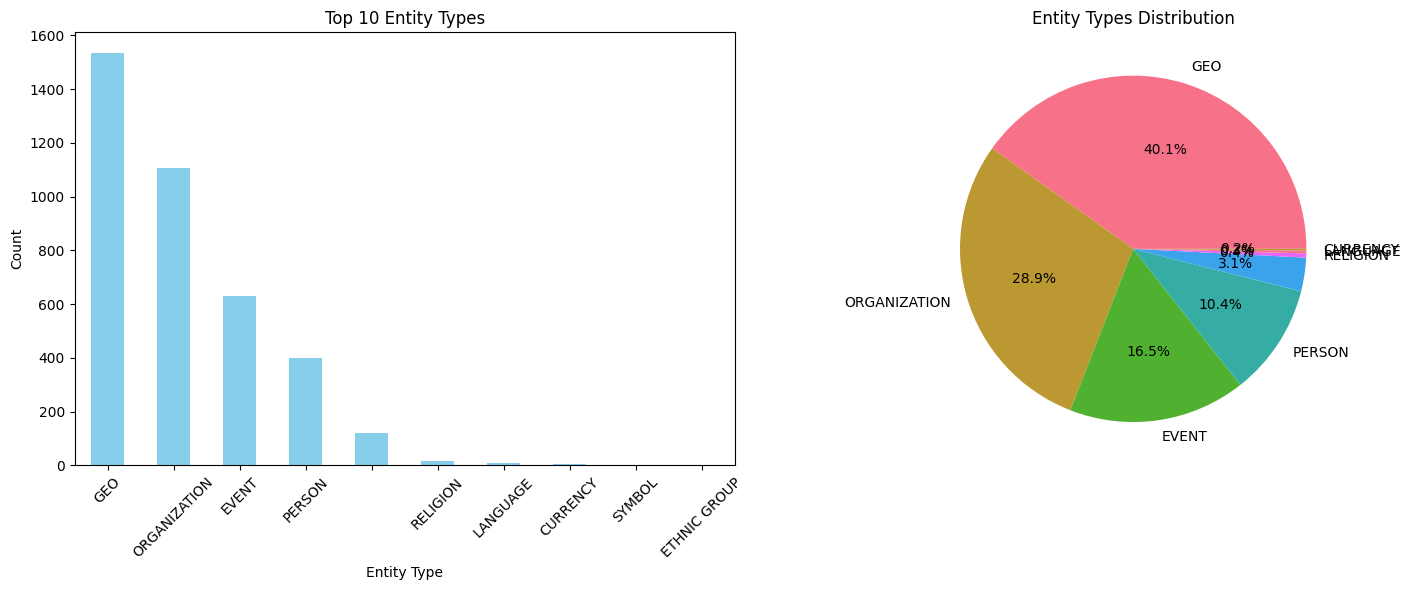


📈 Entity Connectivity:
Average degree: 3.71
Max degree: 149.0
Top connected entities:
1980 LABOR TURMOIL             1.0
1998-1999 WAR                  1.0
2018 PRESIDENTIAL ELECTION     1.0
2020 PRESIDENTIAL ELECTION     1.0
2021 LEGISLATIVE ELECTION      1.0
2022                           1.0
2022 PARLIAMENTARY ELECTION    1.0
2023                           3.0
2023 PRESIDENTIAL ELECTION     3.0
2024                           2.0
Name: count, dtype: float64


In [5]:
# 1. Entity Analysis and Visualization
print("🏷️ ENTITY ANALYSIS")
print("=" * 50)

# Entity types distribution
if 'type' in entities_df.columns:
    entity_types = entities_df['type'].value_counts()
    print(f"Entity Types: {len(entity_types)} unique types")
    print(entity_types.head(10))
    
    # Plot entity types
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot
    entity_types.head(10).plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Top 10 Entity Types')
    ax1.set_xlabel('Entity Type')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # Pie chart for top 8
    entity_types.head(8).plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title('Entity Types Distribution')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# Entity degree analysis (how many relationships each entity has)
if 'source' in relationships_df.columns and 'target' in relationships_df.columns:
    source_counts = relationships_df['source'].value_counts()
    target_counts = relationships_df['target'].value_counts()
    entity_degrees = source_counts.add(target_counts, fill_value=0)
    
    print(f"\n📈 Entity Connectivity:")
    print(f"Average degree: {entity_degrees.mean():.2f}")
    print(f"Max degree: {entity_degrees.max()}")
    print(f"Top connected entities:")
    print(entity_degrees.head(10))


🔗 RELATIONSHIP ANALYSIS
Relationship Types: 5065 unique types
description
Both are among the top export commodities based on value in dollars in 2021.                                           10
Petteri Orpo is the Prime Minister of Finland, leading the government                                                   2
Austria has deployed military forces to Bosnia-Herzegovina as part of the EUFOR stabilization force                     2
Reserves can be used to manage public debt and stabilize the economy                                                    2
Both countries are affected by conflict and have contributed to the refugee crisis                                      2
The Ministry of Interior oversees the National Police and is responsible for internal security in Hungary.              1
Hungarian Defense Forces have deployed personnel to Chad for international missions.                                    1
Hungarian Defense Forces have deployed personnel to Bosnia-Herzegovina 

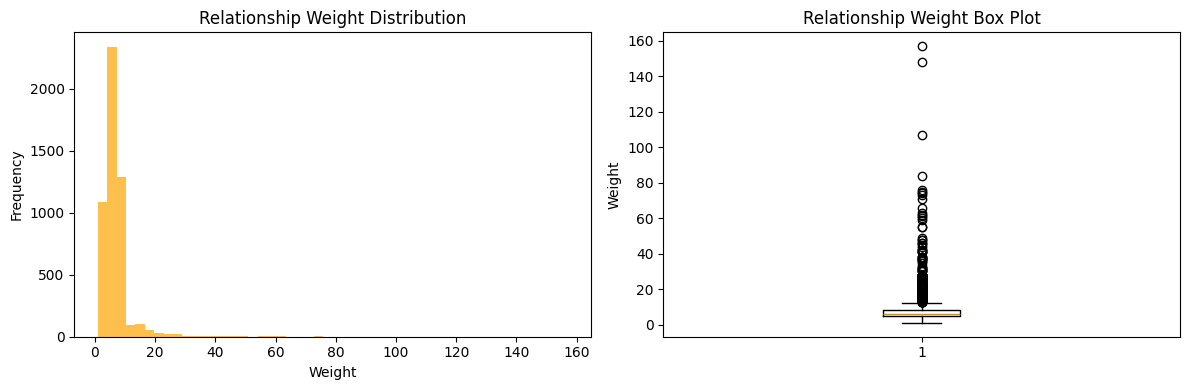


🕸️  Network Density: 0.0007 (5,078 / 7,340,196)


In [6]:
# 2. Relationship Analysis
print("\n🔗 RELATIONSHIP ANALYSIS")
print("=" * 50)

# Relationship types and weights
if 'description' in relationships_df.columns:
    rel_types = relationships_df['description'].value_counts()
    print(f"Relationship Types: {len(rel_types)} unique types")
    print(rel_types.head(10))

# Weight distribution
if 'weight' in relationships_df.columns:
    print(f"\n📊 Relationship Weights:")
    print(f"Average weight: {relationships_df['weight'].mean():.2f}")
    print(f"Weight range: {relationships_df['weight'].min():.2f} - {relationships_df['weight'].max():.2f}")
    
    # Plot weight distribution
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(relationships_df['weight'], bins=50, alpha=0.7, color='orange')
    plt.title('Relationship Weight Distribution')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(relationships_df['weight'])
    plt.title('Relationship Weight Box Plot')
    plt.ylabel('Weight')
    
    plt.tight_layout()
    plt.show()

# Relationship network density
total_possible_edges = len(entities_df) * (len(entities_df) - 1) / 2
actual_edges = len(relationships_df)
density = actual_edges / total_possible_edges
print(f"\n🕸️  Network Density: {density:.4f} ({actual_edges:,} / {total_possible_edges:,.0f})")


🏘️ COMMUNITY ANALYSIS
Community Levels: [0, 1, 2, 3]
level
0     30
1    153
2    223
3     20
Name: count, dtype: int64


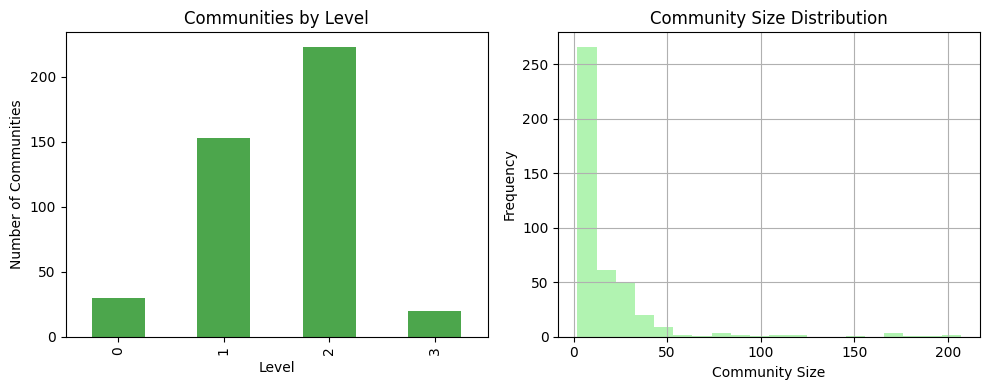


📋 Community Reports:
Total reports: 426
Rank range: 4.0 - 9.5


In [7]:
# 3. Community Analysis
print("\n🏘️ COMMUNITY ANALYSIS")
print("=" * 50)

# Community size distribution
if 'level' in communities_df.columns:
    community_levels = communities_df['level'].value_counts().sort_index()
    print(f"Community Levels: {list(community_levels.index)}")
    print(community_levels)
    
    # Plot community levels
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    community_levels.plot(kind='bar', color='green', alpha=0.7)
    plt.title('Communities by Level')
    plt.xlabel('Level')
    plt.ylabel('Number of Communities')
    
    plt.subplot(1, 2, 2)
    if 'size' in communities_df.columns:
        communities_df['size'].hist(bins=20, alpha=0.7, color='lightgreen')
        plt.title('Community Size Distribution')
        plt.xlabel('Community Size')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Community reports analysis
if len(community_reports_df) > 0:
    print(f"\n📋 Community Reports:")
    print(f"Total reports: {len(community_reports_df)}")
    
    if 'rank' in community_reports_df.columns:
        print(f"Rank range: {community_reports_df['rank'].min()} - {community_reports_df['rank'].max()}")
    
    if 'rating' in community_reports_df.columns:
        print(f"Average rating: {community_reports_df['rating'].mean():.2f}")
        
        plt.figure(figsize=(8, 4))
        community_reports_df['rating'].hist(bins=20, alpha=0.7, color='purple')
        plt.title('Community Report Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

## Search

In [ ]:
import os
import pandas as pd
import asyncio
import tiktoken
from typing import List, Dict, Any
import time

# --- Monkey‑patch aiolimiter's AsyncLimiter for fnllm's rate limiter ---
from aiolimiter import AsyncLimiter
import asyncio as _asyncio

# Provide a _loop property that returns the running loop
AsyncLimiter._loop = property(lambda self: _asyncio.get_running_loop())
# Provide a no-op _wake_next so fnllm's update_limiter calls succeed
AsyncLimiter._wake_next = lambda self: None

# --- Import GraphRAG components ---
from graphrag.query.indexer_adapters import (
    read_indexer_communities,
    read_indexer_entities,
    read_indexer_relationships,
    read_indexer_reports,
    read_indexer_text_units,
)
from graphrag.vector_stores.lancedb import LanceDBVectorStore
from graphrag.query.structured_search.local_search.mixed_context import (
    LocalSearchMixedContext,
)
from graphrag.query.structured_search.local_search.search import LocalSearch
from graphrag.query.structured_search.global_search.search import GlobalSearch
from graphrag.query.structured_search.global_search.community_context import (
    GlobalCommunityContext,
)
from graphrag.query.context_builder.entity_extraction import EntityVectorStoreKey
from graphrag.language_model.manager import ModelManager
from graphrag.config.models.language_model_config import LanguageModelConfig
from graphrag.config.enums import ModelType


class GraphRAGRetrieval:
    """Working GraphRAG implementation using official GraphRAG library."""

    def __init__(self, input_dir: str = "../graphrag/output"):
        self.input_dir = input_dir
        self.lancedb_uri = f"{input_dir}/lancedb"

        # Will hold our loaded data
        self.communities = None
        self.entities = None
        self.relationships = None
        self.reports = None
        self.text_units = None

        # Vector store & models
        self.description_store = None
        self.chat_model = None
        self.text_embedder = None
        self.token_encoder = None

        # Cache for search engines
        self._local_search_engine = None
        self._global_search_engine = None

        self._setup_components()

    def _setup_components(self):
        """Setup GraphRAG components."""
        try:
            # ---------- Load Parquet data ----------
            entity_df = pd.read_parquet(f"{self.input_dir}/entities.parquet")
            relationship_df = pd.read_parquet(f"{self.input_dir}/relationships.parquet")
            report_df = pd.read_parquet(f"{self.input_dir}/community_reports.parquet")
            text_unit_df = pd.read_parquet(f"{self.input_dir}/text_units.parquet")
            communities_df = pd.read_parquet(f"{self.input_dir}/communities.parquet")

            print(f"✅ Loaded GraphRAG data:")
            print(f"  - Entities: {len(entity_df)} rows")
            print(f"  - Relationships: {len(relationship_df)} rows")
            print(f"  - Community reports: {len(report_df)} rows")
            print(f"  - Text units: {len(text_unit_df)} rows")
            print(f"  - Communities: {len(communities_df)} rows")

            self.communities = read_indexer_communities(communities_df, report_df)
            self.entities = read_indexer_entities(
                entity_df, communities_df, community_level=0
            )
            self.relationships = read_indexer_relationships(relationship_df)
            self.reports = read_indexer_reports(
                report_df, communities_df, community_level=0
            )
            self.text_units = read_indexer_text_units(text_unit_df)

            # ---------- Connect to LanceDB ----------
            self.description_store = LanceDBVectorStore(
                collection_name="default-entity-description"
            )
            self.description_store.connect(db_uri=self.lancedb_uri)
            print(f"✅ Connected to LanceDB at: {self.lancedb_uri}")

            # ---------- Initialize Chat Model ----------
            chat_cfg = LanguageModelConfig(
                api_key=os.environ.get("OPENAI_API_KEY"),
                type=ModelType.OpenAIChat,
                model="gpt-4o-mini",
                max_retries=1,
            )
            self.chat_model = ModelManager().get_or_create_chat_model(
                name="graphrag_chat", model_type=ModelType.OpenAIChat, config=chat_cfg
            )

            # ---------- Initialize Embedding Model ----------
            embed_cfg = LanguageModelConfig(
                api_key=os.environ.get("OPENAI_API_KEY"),
                type=ModelType.OpenAIEmbedding,
                model="text-embedding-3-small",
                max_retries=1,
            )
            self.text_embedder = ModelManager().get_or_create_embedding_model(
                name="graphrag_embedding",
                model_type=ModelType.OpenAIEmbedding,
                config=embed_cfg,
            )

            # ---------- Token Encoder ----------
            self.token_encoder = tiktoken.encoding_for_model("gpt-4o-mini")

            print("✅ GraphRAG components initialized successfully")

        except Exception as e:
            print(f"❌ Error setting up GraphRAG components: {e}")
            raise

    def _get_local_search(self) -> LocalSearch:
        """Get or create local search engine."""
        if self._local_search_engine is None:
            print("🔧 Creating local search engine (cached for reuse)...")
            ctx = LocalSearchMixedContext(
                community_reports=self.reports,
                text_units=self.text_units,
                entities=self.entities,
                relationships=self.relationships,
                covariates=None,
                entity_text_embeddings=self.description_store,
                embedding_vectorstore_key=EntityVectorStoreKey.ID,
                text_embedder=self.text_embedder,
                token_encoder=self.token_encoder,
            )
            local_params = {
                "text_unit_prop": 0.5,
                "community_prop": 0.1,
                "conversation_history_max_turns": 0,
                "conversation_history_user_turns_only": True,
                "top_k_mapped_entities": 5,
                "top_k_relationships": 3,
                "include_entity_rank": False,
                "include_relationship_weight": False,
                "include_community_rank": False,
                "return_candidate_context": False,
                "embedding_vectorstore_key": EntityVectorStoreKey.ID,
                "max_tokens": 1_000,
            }
            model_params = {"max_tokens": 1_000, "temperature": 0.0}

            self._local_search_engine = LocalSearch(
                model=self.chat_model,
                context_builder=ctx,
                token_encoder=self.token_encoder,
                model_params=model_params,
                context_builder_params=local_params,
                response_type="multiple paragraphs",
            )
            print(f"✅ Local search engine created and cached")
        return self._local_search_engine

    def _get_global_search(self) -> GlobalSearch:
        """Get or create global search engine."""
        if self._global_search_engine is None:
            print("🔧 Creating global search engine (cached for reuse)...")
            ctx = GlobalCommunityContext(
                community_reports=self.reports,
                communities=self.communities,
                entities=self.entities,
                token_encoder=self.token_encoder,
            )
            global_params = {
                "use_community_summary": True,
                "shuffle_data": True,
                "include_community_rank": True,
                "min_community_rank": 0,
                "community_rank_name": "rank",
                "include_community_weight": True,
                "community_weight_name": "occurrence weight",
                "normalize_community_weight": True,
                "max_tokens": 1_000,
                "context_name": "Reports",
            }
            map_params = {
                "max_tokens": 1_000,
                "temperature": 0.0,
                "response_format": {"type": "json_object"},
            }
            reduce_params = {"max_tokens": 1_000, "temperature": 0.0}

            self._global_search_engine = GlobalSearch(
                model=self.chat_model,
                context_builder=ctx,
                token_encoder=self.token_encoder,
                max_data_tokens=1_000,
                map_llm_params=map_params,
                reduce_llm_params=reduce_params,
                allow_general_knowledge=False,
                json_mode=True,
                context_builder_params=global_params,
                concurrent_coroutines=16,
                response_type="multiple paragraphs",
            )
            print(f"✅ Global search engine created and cached")
        return self._global_search_engine

    async def local_search(self, query: str):
        """Perform local search."""
        try:
            print(f"🔍 Starting local search for: {query}")
            import time

            start = time.time()
            search_engine = self._get_local_search()
            engine_ready = time.time()
            print(f"⏱️ Search engine ready in {engine_ready - start:.2f}s")
            result = await search_engine.search(query)
            end = time.time()
            print(
                f"⏱️ Local search completed in {end - start:.2f}s (engine: {engine_ready - start:.2f}s, search: {end - engine_ready:.2f}s)"
            )
            return result
        except Exception as e:
            print(f"❌ Error in local search: {e}")
            # Return a fallback response structure
            return type(
                "obj", (object,), {"response": f"Error in local search: {str(e)}"}
            )

    async def global_search(self, query: str):
        """Perform global search."""
        try:
            search_engine = self._get_global_search()
            result = await search_engine.search(query)
            return result
        except Exception as e:
            print(f"❌ Error in global search: {e}")
            # Return a fallback response structure
            return type(
                "obj", (object,), {"response": f"Error in global search: {str(e)}"}
            )

    def get_document_info(self) -> Dict[str, Any]:
        """Get information about the GraphRAG system"""
        return {
            "method": "working_graph_rag",
            "retrieval_strategy": "Working GraphRAG using official GraphRAG library",
            "entities": len(self.entities) if self.entities else 0,
            "relationships": len(self.relationships) if self.relationships else 0,
            "community_reports": len(self.reports) if self.reports else 0,
            "text_units": len(self.text_units) if self.text_units else 0,
            "communities": len(self.communities) if self.communities else 0,
            "data_source": "Working GraphRAG using official GraphRAG library",
            "chat_model": "gpt-4o-mini",
            "embedding_model": "text-embedding-3-small",
            "search_types": ["local", "global"],
        }

    def get_graph_traversal_info(self, query: str) -> Dict[str, Any]:
        """Get graph traversal information for a query"""
        try:
            # Return format expected by the comparison tool
            return {
                "query": query,
                "total_entities": len(self.entities) if self.entities else 0,
                "total_relationships": (
                    len(self.relationships) if self.relationships else 0
                ),
                "method": "working_graphrag",
            }

        except Exception as e:
            return {
                "query": query,
                "error": str(e),
                "total_entities": 0,
                "total_relationships": 0,
                "method": "working_graphrag",
            }

In [29]:
graphrag = GraphRAGRetrieval()

# Test local search
start_time = time.time()
local_result = await graphrag.local_search("What's the relationship between Albania and Tobacco use?")
end_time = time.time()
print("Local search response:", getattr(local_result, "response", local_result))
print(f"Local search time: {end_time - start_time} seconds")

✅ Loaded GraphRAG data:
  - Entities: 3832 rows
  - Relationships: 5078 rows
  - Community reports: 426 rows
  - Text units: 445 rows
  - Communities: 426 rows
✅ Connected to LanceDB at: ../graphrag/output/lancedb
✅ GraphRAG components initialized successfully
🔍 Starting local search for: What's the relationship between Albania and Tobacco use?
🔧 Creating local search engine (cached for reuse)...
✅ Local search engine created and cached
⏱️ Search engine ready in 0.00s
2025-07-18 12:00:01.0025 - WARNING - graphrag.query.context_builder.community_context - Warning: No community records added when building community context.
⏱️ Local search completed in 6.79s (engine: 0.00s, search: 6.79s)
Local search response: ## Relationship Between Albania and Tobacco Use

Tobacco use is a significant public health concern in Albania, reflecting broader trends observed in various countries. The projected tobacco use rate in Albania for 2025 is estimated at 26.7%, with a notable disparity between male 

In [30]:
local_result.context_data["entities"].head()

,id,entity,description,in_context
0,50,TOBACCO USE,Tobacco use remains a significant public healt...,True
1,467,ALBANIA,Albania is a country located in Southeast Euro...,True
2,49,ALCOHOL CONSUMPTION,Alcohol consumption refers to the average amou...,True
3,3603,ALCOHOL AND TOBACCO EXPENDITURES,Expenditures on alcohol and tobacco represent ...,True
4,271,ILLICIT DRUGS,Illicit drugs encompass a range of illegal sub...,True


In [36]:
local_result.context_data["relationships"].head()
for index, row in local_result.context_data["relationships"].iterrows():
    print(row["id"], row["description"])

1247 Tobacco use rates are a public health concern in Albania, affecting different demographics
1246 Alcohol consumption statistics provide insight into lifestyle and health trends in Albania
1223 Tirana is the capital city of Albania, serving as its political and cultural center.
1257 Tirana is the capital city of Albania, serving as the political and cultural center of the country
1220 Ethnic Albanians are the primary population group in Albania, defining its national identity.
1475 Alcohol consumption and tobacco use are critical indicators of public health behaviors within the population. Both are significant public health issues that impact the well-being of individuals and communities. Research indicates that higher levels of alcohol consumption may correlate with increased tobacco use, suggesting a relationship between these two behaviors that reflects broader lifestyle choices and associated health risks. This correlation highlights the importance of addressing both alcohol and

In [32]:
if "reports" in local_result.context_data:
    local_result.context_data["reports"].head()

In [35]:
local_result.context_data["sources"].head()

for index, row in local_result.context_data["sources"].iterrows():
    print(row["id"], row["text"])

222 nHealth Expenditure:\n  Health Expenditure (As % Of Gdp):\n    6.5% of GDP (2021)\n  Health Expenditure (As % Of National Budget):\n    11.2% of national budget (2022 est.)\nPhysician Density:\n  3.63 physicians/1,000 population (2022)\nHospital Bed Density:\n  7.1 beds/1,000 population (2020 est.)\nSanitation Facility Access:\n  Improved: Urban:\n    urban: 96.9% of population\n  Improved: Rural:\n    rural: 76% of population\n  Improved: Total:\n    total: 87.3% of population\n  Unimproved: Urban:\n    urban: 3.1% of population\n  Unimproved: Rural:\n    rural: 24% of population\n  Unimproved: Total:\n    total: 12.7% of population (2020 est.)\nObesity - Adult Prevalence Rate:\n  22.5% (2016)\nAlcohol Consumption Per Capita:\n  Total:\n    10.96 liters of pure alcohol (2019 est.)\n  Beer:\n    5.33 liters of pure alcohol (2019 est.)\n  Wine:\n    3.38 liters of pure alcohol (2019 est.)\n  Spirits:\n    2.25 liters of pure alcohol (2019 est.)\n  Other Alcohols:\n    0 liters of pu

In [34]:
if "claims" in local_result.context_data:
    print(local_result.context_data["claims"].head())

In [38]:
graphrag._local_search_engine.context_builder.build_context(
    query="What's the relationship between Albania and Tobacco use?"
).context_chunks

2025-07-18 12:15:00.0841 - WARNING - graphrag.query.structured_search.local_search.mixed_context - Reached token limit - reverting to previous context state


'-----Reports-----\nid|title|content\n14|Balkan Community: Montenegro, Albania, and the Czech Republic|"# Balkan Community: Montenegro, Albania, and the Czech Republic\n\nThis report examines the interconnected community of Montenegro, Albania, and the Czech Republic, highlighting their historical ties, economic relationships, and geopolitical dynamics. The entities within this community share significant cultural and political connections, influencing their regional stability and development.\n\n## Historical Ties Between Montenegro and Serbia\n\nMontenegro and Serbia share a deep historical and cultural connection, having been part of the same state entities for much of the 20th century. This relationship has shaped their national identities and continues to influence their political dynamics. The historical ties can lead to both cooperation and conflict, particularly in the context of national pride and territorial integrity. The legacy of shared governance has resulted in a complex